In [1]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from model import ShallowNet

print('Tensorflow version: {}'.format(tf.__version__))

Tensorflow version: 1.12.0


In [2]:
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype(np.float) / 255.0
testX = testX.astype(np.float) / 255.0

# One-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

print("[INFO] compiling model...")
opt = Adam(
    lr=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=None,
    decay=0.001,
    amsgrad=False
)
parameters = {
    'width':    32,
    'height':   32,
    'channels': 3,
    'classes':  10
}
model = ShallowNet.build(parameters)
model.compile(
    loss="categorical_crossentropy",
    optimizer=opt,
    metrics=["accuracy"]
)
# Print model summary
model.summary()

[INFO] loading CIFAR-10 data...


[INFO] compiling model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                327690    
Total params: 328,586
Trainable params: 328,586
Non-trainable params: 0
_________________________________________________________________


In [3]:
print("[INFO] training network...")
H = model.fit(
    trainX, trainY, 
    validation_data=(testX, testY),
    batch_size=32,
    epochs=60,
    verbose=1
)

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/60


   32/50000 [..............................] - ETA: 2:53 - loss: 2.4011 - acc: 0.1562

  224/50000 [..............................] - ETA: 37s - loss: 10.9729 - acc: 0.1473

  448/50000 [..............................] - ETA: 24s - loss: 9.2672 - acc: 0.1250 

  672/50000 [..............................] - ETA: 20s - loss: 7.0074 - acc: 0.1101

  896/50000 [..............................] - ETA: 18s - loss: 5.8591 - acc: 0.1071

 1120/50000 [..............................] - ETA: 16s - loss: 5.1617 - acc: 0.1062

 1344/50000 [..............................] - ETA: 15s - loss: 4.6974 - acc: 0.1057

 1536/50000 [..............................] - ETA: 15s - loss: 4.4032 - acc: 0.1061

 1728/50000 [>.............................] - ETA: 15s - loss: 4.1743 - acc: 0.1065

 1952/50000 [>.............................] - ETA: 14s - loss: 3.9615 - acc: 0.1066

 2176/50000 [>.............................] - ETA: 14s - loss: 3.7925 - acc: 0.1034

 2400/50000 [>.............................] - ETA: 14s - loss: 3.6522 - acc: 0.1046

 2624/50000 [>.............................] - ETA: 13s - loss: 3.5391 - acc: 0.1006

 2848/50000 [>.............................] - ETA: 13s - loss: 3.4428 - acc: 0.1011

 3072/50000 [>.............................] - ETA: 13s - loss: 3.3594 - acc: 0.1016

 3296/50000 [>.............................] - ETA: 13s - loss: 3.2874 - acc: 0.0998

 3520/50000 [=>............................] - ETA: 13s - loss: 3.2267 - acc: 0.0983

 3744/50000 [=>............................] - ETA: 12s - loss: 3.1716 - acc: 0.0999

 3968/50000 [=>............................] - ETA: 12s - loss: 3.1215 - acc: 0.0985

 4192/50000 [=>............................] - ETA: 12s - loss: 3.0771 - acc: 0.1004

 4416/50000 [=>............................] - ETA: 12s - loss: 3.0385 - acc: 0.1010

 4640/50000 [=>............................] - ETA: 12s - loss: 3.0027 - acc: 0.1009

 4864/50000 [=>............................] - ETA: 12s - loss: 2.9705 - acc: 0.1024

 5088/50000 [==>...........................] - ETA: 12s - loss: 2.9411 - acc: 0.1026

 5312/50000 [==>...........................] - ETA: 12s - loss: 2.9141 - acc: 0.1024

 5536/50000 [==>...........................] - ETA: 12s - loss: 2.8891 - acc: 0.1028

 5760/50000 [==>...........................] - ETA: 11s - loss: 2.8661 - acc: 0.1033

 5984/50000 [==>...........................] - ETA: 11s - loss: 2.8446 - acc: 0.1041

 6208/50000 [==>...........................] - ETA: 11s - loss: 2.8239 - acc: 0.1047

 6400/50000 [==>...........................] - ETA: 11s - loss: 2.8081 - acc: 0.1045

 6624/50000 [==>...........................] - ETA: 11s - loss: 2.7906 - acc: 0.1049

 6848/50000 [===>..........................] - ETA: 11s - loss: 2.7752 - acc: 0.1056

 7072/50000 [===>..........................] - ETA: 11s - loss: 2.7601 - acc: 0.1065

 7296/50000 [===>..........................] - ETA: 11s - loss: 2.7445 - acc: 0.1076

 7520/50000 [===>..........................] - ETA: 11s - loss: 2.7311 - acc: 0.1077

 7744/50000 [===>..........................] - ETA: 11s - loss: 2.7178 - acc: 0.1086

 7968/50000 [===>..........................] - ETA: 11s - loss: 2.7054 - acc: 0.1106

 8192/50000 [===>..........................] - ETA: 10s - loss: 2.6922 - acc: 0.1132

 8416/50000 [====>.........................] - ETA: 10s - loss: 2.6781 - acc: 0.1156

 8640/50000 [====>.........................] - ETA: 10s - loss: 2.6670 - acc: 0.1179

 8832/50000 [====>.........................] - ETA: 10s - loss: 2.6571 - acc: 0.1198

 9024/50000 [====>.........................] - ETA: 10s - loss: 2.6491 - acc: 0.1218

 9248/50000 [====>.........................] - ETA: 10s - loss: 2.6375 - acc: 0.1236

 9472/50000 [====>.........................] - ETA: 10s - loss: 2.6280 - acc: 0.1249

 9696/50000 [====>.........................] - ETA: 10s - loss: 2.6173 - acc: 0.1267

 9920/50000 [====>.........................] - ETA: 10s - loss: 2.6065 - acc: 0.1289

10144/50000 [=====>........................] - ETA: 10s - loss: 2.5933 - acc: 0.1329

10368/50000 [=====>........................] - ETA: 10s - loss: 2.5827 - acc: 0.1355

10592/50000 [=====>........................] - ETA: 10s - loss: 2.5736 - acc: 0.1367

10816/50000 [=====>........................] - ETA: 10s - loss: 2.5646 - acc: 0.1385

11040/50000 [=====>........................] - ETA: 10s - loss: 2.5556 - acc: 0.1409

11264/50000 [=====>........................] - ETA: 10s - loss: 2.5467 - acc: 0.1419

11488/50000 [=====>........................] - ETA: 9s - loss: 2.5389 - acc: 0.1449 

11712/50000 [======>.......................] - ETA: 9s - loss: 2.5321 - acc: 0.1462

11936/50000 [======>.......................] - ETA: 9s - loss: 2.5242 - acc: 0.1480

12128/50000 [======>.......................] - ETA: 9s - loss: 2.5187 - acc: 0.1485

12352/50000 [======>.......................] - ETA: 9s - loss: 2.5113 - acc: 0.1508

12576/50000 [======>.......................] - ETA: 9s - loss: 2.5023 - acc: 0.1531

12800/50000 [======>.......................] - ETA: 9s - loss: 2.4946 - acc: 0.1548

13024/50000 [======>.......................] - ETA: 9s - loss: 2.4852 - acc: 0.1569

13248/50000 [======>.......................] - ETA: 9s - loss: 2.4769 - acc: 0.1587

13472/50000 [=======>......................] - ETA: 9s - loss: 2.4704 - acc: 0.1606

13696/50000 [=======>......................] - ETA: 9s - loss: 2.4650 - acc: 0.1620

13888/50000 [=======>......................] - ETA: 9s - loss: 2.4599 - acc: 0.1630

14112/50000 [=======>......................] - ETA: 9s - loss: 2.4534 - acc: 0.1648

14336/50000 [=======>......................] - ETA: 9s - loss: 2.4476 - acc: 0.1659

14560/50000 [=======>......................] - ETA: 9s - loss: 2.4405 - acc: 0.1672

14784/50000 [=======>......................] - ETA: 9s - loss: 2.4344 - acc: 0.1688

15008/50000 [========>.....................] - ETA: 8s - loss: 2.4278 - acc: 0.1704

15232/50000 [========>.....................] - ETA: 8s - loss: 2.4227 - acc: 0.1719

15456/50000 [========>.....................] - ETA: 8s - loss: 2.4162 - acc: 0.1737

15680/50000 [========>.....................] - ETA: 8s - loss: 2.4098 - acc: 0.1754

15904/50000 [========>.....................] - ETA: 8s - loss: 2.4038 - acc: 0.1773

16128/50000 [========>.....................] - ETA: 8s - loss: 2.3983 - acc: 0.1783

16352/50000 [========>.....................] - ETA: 8s - loss: 2.3932 - acc: 0.1795

16544/50000 [========>.....................] - ETA: 8s - loss: 2.3882 - acc: 0.1808

16768/50000 [=========>....................] - ETA: 8s - loss: 2.3840 - acc: 0.1823

16992/50000 [=========>....................] - ETA: 8s - loss: 2.3794 - acc: 0.1837

17184/50000 [=========>....................] - ETA: 8s - loss: 2.3750 - acc: 0.1851

17408/50000 [=========>....................] - ETA: 8s - loss: 2.3696 - acc: 0.1863

17632/50000 [=========>....................] - ETA: 8s - loss: 2.3658 - acc: 0.1875

17856/50000 [=========>....................] - ETA: 8s - loss: 2.3607 - acc: 0.1881

18080/50000 [=========>....................] - ETA: 8s - loss: 2.3571 - acc: 0.1889

18304/50000 [=========>....................] - ETA: 8s - loss: 2.3523 - acc: 0.1901

18528/50000 [==========>...................] - ETA: 7s - loss: 2.3482 - acc: 0.1913

18752/50000 [==========>...................] - ETA: 7s - loss: 2.3434 - acc: 0.1928

18976/50000 [==========>...................] - ETA: 7s - loss: 2.3387 - acc: 0.1938

19200/50000 [==========>...................] - ETA: 7s - loss: 2.3333 - acc: 0.1948

19424/50000 [==========>...................] - ETA: 7s - loss: 2.3293 - acc: 0.1960

19648/50000 [==========>...................] - ETA: 7s - loss: 2.3258 - acc: 0.1969

19872/50000 [==========>...................] - ETA: 7s - loss: 2.3232 - acc: 0.1982

20096/50000 [===========>..................] - ETA: 7s - loss: 2.3198 - acc: 0.1993

20320/50000 [===========>..................] - ETA: 7s - loss: 2.3165 - acc: 0.2003

20544/50000 [===========>..................] - ETA: 7s - loss: 2.3142 - acc: 0.2009

20768/50000 [===========>..................] - ETA: 7s - loss: 2.3111 - acc: 0.2012

20992/50000 [===========>..................] - ETA: 7s - loss: 2.3078 - acc: 0.2027

21216/50000 [===========>..................] - ETA: 7s - loss: 2.3044 - acc: 0.2038

21440/50000 [===========>..................] - ETA: 7s - loss: 2.2996 - acc: 0.2051

21664/50000 [===========>..................] - ETA: 7s - loss: 2.2966 - acc: 0.2060

21888/50000 [============>.................] - ETA: 7s - loss: 2.2941 - acc: 0.2068

22112/50000 [============>.................] - ETA: 7s - loss: 2.2906 - acc: 0.2082

22336/50000 [============>.................] - ETA: 6s - loss: 2.2886 - acc: 0.2089

22560/50000 [============>.................] - ETA: 6s - loss: 2.2855 - acc: 0.2096

22784/50000 [============>.................] - ETA: 6s - loss: 2.2832 - acc: 0.2106

23008/50000 [============>.................] - ETA: 6s - loss: 2.2818 - acc: 0.2107

23232/50000 [============>.................] - ETA: 6s - loss: 2.2794 - acc: 0.2111

23456/50000 [=============>................] - ETA: 6s - loss: 2.2772 - acc: 0.2117

23680/50000 [=============>................] - ETA: 6s - loss: 2.2757 - acc: 0.2120

23904/50000 [=============>................] - ETA: 6s - loss: 2.2733 - acc: 0.2128

24128/50000 [=============>................] - ETA: 6s - loss: 2.2699 - acc: 0.2135

24352/50000 [=============>................] - ETA: 6s - loss: 2.2662 - acc: 0.2147

24576/50000 [=============>................] - ETA: 6s - loss: 2.2647 - acc: 0.2148

24800/50000 [=============>................] - ETA: 6s - loss: 2.2629 - acc: 0.2149

25024/50000 [==============>...............] - ETA: 6s - loss: 2.2603 - acc: 0.2157

25248/50000 [==============>...............] - ETA: 6s - loss: 2.2576 - acc: 0.2163

25472/50000 [==============>...............] - ETA: 6s - loss: 2.2560 - acc: 0.2170

25664/50000 [==============>...............] - ETA: 6s - loss: 2.2540 - acc: 0.2175

25888/50000 [==============>...............] - ETA: 6s - loss: 2.2520 - acc: 0.2182

26112/50000 [==============>...............] - ETA: 6s - loss: 2.2497 - acc: 0.2189

26336/50000 [==============>...............] - ETA: 5s - loss: 2.2476 - acc: 0.2196

26560/50000 [==============>...............] - ETA: 5s - loss: 2.2454 - acc: 0.2207

26784/50000 [===============>..............] - ETA: 5s - loss: 2.2424 - acc: 0.2217

27008/50000 [===============>..............] - ETA: 5s - loss: 2.2401 - acc: 0.2220

27232/50000 [===============>..............] - ETA: 5s - loss: 2.2377 - acc: 0.2225

27456/50000 [===============>..............] - ETA: 5s - loss: 2.2353 - acc: 0.2235

27680/50000 [===============>..............] - ETA: 5s - loss: 2.2333 - acc: 0.2242

27904/50000 [===============>..............] - ETA: 5s - loss: 2.2309 - acc: 0.2248

28128/50000 [===============>..............] - ETA: 5s - loss: 2.2285 - acc: 0.2251

28352/50000 [================>.............] - ETA: 5s - loss: 2.2256 - acc: 0.2262

28576/50000 [================>.............] - ETA: 5s - loss: 2.2236 - acc: 0.2269

28800/50000 [================>.............] - ETA: 5s - loss: 2.2207 - acc: 0.2279

29024/50000 [================>.............] - ETA: 5s - loss: 2.2179 - acc: 0.2288

29216/50000 [================>.............] - ETA: 5s - loss: 2.2165 - acc: 0.2292

29440/50000 [================>.............] - ETA: 5s - loss: 2.2145 - acc: 0.2299

29664/50000 [================>.............] - ETA: 5s - loss: 2.2114 - acc: 0.2312

29856/50000 [================>.............] - ETA: 5s - loss: 2.2098 - acc: 0.2316

30080/50000 [=================>............] - ETA: 4s - loss: 2.2075 - acc: 0.2320

30304/50000 [=================>............] - ETA: 4s - loss: 2.2050 - acc: 0.2326

30528/50000 [=================>............] - ETA: 4s - loss: 2.2032 - acc: 0.2329

30752/50000 [=================>............] - ETA: 4s - loss: 2.2014 - acc: 0.2334

30944/50000 [=================>............] - ETA: 4s - loss: 2.1992 - acc: 0.2341

31136/50000 [=================>............] - ETA: 4s - loss: 2.1971 - acc: 0.2346

31360/50000 [=================>............] - ETA: 4s - loss: 2.1945 - acc: 0.2354

31552/50000 [=================>............] - ETA: 4s - loss: 2.1932 - acc: 0.2356

31776/50000 [==================>...........] - ETA: 4s - loss: 2.1910 - acc: 0.2362

32000/50000 [==================>...........] - ETA: 4s - loss: 2.1893 - acc: 0.2369

32224/50000 [==================>...........] - ETA: 4s - loss: 2.1872 - acc: 0.2374

32448/50000 [==================>...........] - ETA: 4s - loss: 2.1855 - acc: 0.2381

32672/50000 [==================>...........] - ETA: 4s - loss: 2.1832 - acc: 0.2390

32896/50000 [==================>...........] - ETA: 4s - loss: 2.1808 - acc: 0.2396

33120/50000 [==================>...........] - ETA: 4s - loss: 2.1783 - acc: 0.2404

33344/50000 [===================>..........] - ETA: 4s - loss: 2.1768 - acc: 0.2409

33568/50000 [===================>..........] - ETA: 4s - loss: 2.1751 - acc: 0.2412

33792/50000 [===================>..........] - ETA: 4s - loss: 2.1736 - acc: 0.2417

34016/50000 [===================>..........] - ETA: 4s - loss: 2.1725 - acc: 0.2418

34208/50000 [===================>..........] - ETA: 3s - loss: 2.1711 - acc: 0.2424

34432/50000 [===================>..........] - ETA: 3s - loss: 2.1688 - acc: 0.2431

34656/50000 [===================>..........] - ETA: 3s - loss: 2.1673 - acc: 0.2437

34880/50000 [===================>..........] - ETA: 3s - loss: 2.1654 - acc: 0.2440

35104/50000 [====================>.........] - ETA: 3s - loss: 2.1635 - acc: 0.2444

35328/50000 [====================>.........] - ETA: 3s - loss: 2.1613 - acc: 0.2447

35552/50000 [====================>.........] - ETA: 3s - loss: 2.1595 - acc: 0.2452

35776/50000 [====================>.........] - ETA: 3s - loss: 2.1578 - acc: 0.2456

36000/50000 [====================>.........] - ETA: 3s - loss: 2.1563 - acc: 0.2461

36224/50000 [====================>.........] - ETA: 3s - loss: 2.1550 - acc: 0.2465

36448/50000 [====================>.........] - ETA: 3s - loss: 2.1536 - acc: 0.2468

36672/50000 [=====================>........] - ETA: 3s - loss: 2.1516 - acc: 0.2476

36896/50000 [=====================>........] - ETA: 3s - loss: 2.1499 - acc: 0.2480

37120/50000 [=====================>........] - ETA: 3s - loss: 2.1483 - acc: 0.2486

37344/50000 [=====================>........] - ETA: 3s - loss: 2.1464 - acc: 0.2493

37568/50000 [=====================>........] - ETA: 3s - loss: 2.1450 - acc: 0.2500

37792/50000 [=====================>........] - ETA: 3s - loss: 2.1436 - acc: 0.2503

38016/50000 [=====================>........] - ETA: 2s - loss: 2.1427 - acc: 0.2505

38240/50000 [=====================>........] - ETA: 2s - loss: 2.1410 - acc: 0.2511

38464/50000 [======================>.......] - ETA: 2s - loss: 2.1395 - acc: 0.2516

38656/50000 [======================>.......] - ETA: 2s - loss: 2.1381 - acc: 0.2522

38880/50000 [======================>.......] - ETA: 2s - loss: 2.1366 - acc: 0.2526

39104/50000 [======================>.......] - ETA: 2s - loss: 2.1352 - acc: 0.2529

39328/50000 [======================>.......] - ETA: 2s - loss: 2.1329 - acc: 0.2538

39520/50000 [======================>.......] - ETA: 2s - loss: 2.1318 - acc: 0.2542

39744/50000 [======================>.......] - ETA: 2s - loss: 2.1306 - acc: 0.2546

39968/50000 [======================>.......] - ETA: 2s - loss: 2.1294 - acc: 0.2552

40192/50000 [=======================>......] - ETA: 2s - loss: 2.1278 - acc: 0.2555

40384/50000 [=======================>......] - ETA: 2s - loss: 2.1269 - acc: 0.2559

40608/50000 [=======================>......] - ETA: 2s - loss: 2.1259 - acc: 0.2559

40832/50000 [=======================>......] - ETA: 2s - loss: 2.1246 - acc: 0.2564

41056/50000 [=======================>......] - ETA: 2s - loss: 2.1236 - acc: 0.2567

41280/50000 [=======================>......] - ETA: 2s - loss: 2.1226 - acc: 0.2571

41504/50000 [=======================>......] - ETA: 2s - loss: 2.1213 - acc: 0.2575

41728/50000 [========================>.....] - ETA: 2s - loss: 2.1202 - acc: 0.2581

41952/50000 [========================>.....] - ETA: 2s - loss: 2.1191 - acc: 0.2585

42176/50000 [========================>.....] - ETA: 1s - loss: 2.1184 - acc: 0.2586

42400/50000 [========================>.....] - ETA: 1s - loss: 2.1175 - acc: 0.2588

42624/50000 [========================>.....] - ETA: 1s - loss: 2.1163 - acc: 0.2592

42848/50000 [========================>.....] - ETA: 1s - loss: 2.1151 - acc: 0.2598

43072/50000 [========================>.....] - ETA: 1s - loss: 2.1138 - acc: 0.2604

43296/50000 [========================>.....] - ETA: 1s - loss: 2.1126 - acc: 0.2609

43520/50000 [=========================>....] - ETA: 1s - loss: 2.1115 - acc: 0.2613

43744/50000 [=========================>....] - ETA: 1s - loss: 2.1104 - acc: 0.2615

43968/50000 [=========================>....] - ETA: 1s - loss: 2.1092 - acc: 0.2620

44192/50000 [=========================>....] - ETA: 1s - loss: 2.1083 - acc: 0.2623

44416/50000 [=========================>....] - ETA: 1s - loss: 2.1078 - acc: 0.2622

44640/50000 [=========================>....] - ETA: 1s - loss: 2.1064 - acc: 0.2628

44864/50000 [=========================>....] - ETA: 1s - loss: 2.1055 - acc: 0.2630

45088/50000 [==========================>...] - ETA: 1s - loss: 2.1040 - acc: 0.2634

45312/50000 [==========================>...] - ETA: 1s - loss: 2.1025 - acc: 0.2638

45536/50000 [==========================>...] - ETA: 1s - loss: 2.1020 - acc: 0.2642

45760/50000 [==========================>...] - ETA: 1s - loss: 2.1016 - acc: 0.2643

45984/50000 [==========================>...] - ETA: 0s - loss: 2.1002 - acc: 0.2647

46208/50000 [==========================>...] - ETA: 0s - loss: 2.0990 - acc: 0.2651

46432/50000 [==========================>...] - ETA: 0s - loss: 2.0981 - acc: 0.2654

46656/50000 [==========================>...] - ETA: 0s - loss: 2.0973 - acc: 0.2656

46848/50000 [===========================>..] - ETA: 0s - loss: 2.0965 - acc: 0.2660

47072/50000 [===========================>..] - ETA: 0s - loss: 2.0954 - acc: 0.2663

47296/50000 [===========================>..] - ETA: 0s - loss: 2.0946 - acc: 0.2664

47488/50000 [===========================>..] - ETA: 0s - loss: 2.0933 - acc: 0.2670

47712/50000 [===========================>..] - ETA: 0s - loss: 2.0919 - acc: 0.2674

47936/50000 [===========================>..] - ETA: 0s - loss: 2.0909 - acc: 0.2679

48160/50000 [===========================>..] - ETA: 0s - loss: 2.0899 - acc: 0.2684

48384/50000 [============================>.] - ETA: 0s - loss: 2.0890 - acc: 0.2686

48576/50000 [============================>.] - ETA: 0s - loss: 2.0882 - acc: 0.2688

48800/50000 [============================>.] - ETA: 0s - loss: 2.0873 - acc: 0.2690

49024/50000 [============================>.] - ETA: 0s - loss: 2.0865 - acc: 0.2693

49248/50000 [============================>.] - ETA: 0s - loss: 2.0855 - acc: 0.2695

49472/50000 [============================>.] - ETA: 0s - loss: 2.0847 - acc: 0.2697

49696/50000 [============================>.] - ETA: 0s - loss: 2.0835 - acc: 0.2700

49920/50000 [============================>.] - ETA: 0s - loss: 2.0827 - acc: 0.2702

50000/50000 [==============================] - 13s 269us/step - loss: 2.0823 - acc: 0.2704 - val_loss: 1.8636 - val_acc: 0.3388


Epoch 2/60
   32/50000 [..............................] - ETA: 17s - loss: 1.8607 - acc: 0.3125

  224/50000 [..............................] - ETA: 13s - loss: 1.8729 - acc: 0.2946

  448/50000 [..............................] - ETA: 13s - loss: 1.8711 - acc: 0.3147

  672/50000 [..............................] - ETA: 12s - loss: 1.8823 - acc: 0.3095

  896/50000 [..............................] - ETA: 12s - loss: 1.8829 - acc: 0.3181

 1120/50000 [..............................] - ETA: 12s - loss: 1.8622 - acc: 0.3214

 1344/50000 [..............................] - ETA: 12s - loss: 1.8470 - acc: 0.3296

 1568/50000 [..............................] - ETA: 12s - loss: 1.8659 - acc: 0.3240

 1792/50000 [>.............................] - ETA: 12s - loss: 1.8627 - acc: 0.3309

 2016/50000 [>.............................] - ETA: 12s - loss: 1.8510 - acc: 0.3383

 2240/50000 [>.............................] - ETA: 12s - loss: 1.8484 - acc: 0.3375

 2464/50000 [>.............................] - ETA: 12s - loss: 1.8472 - acc: 0.3401

 2688/50000 [>.............................] - ETA: 11s - loss: 1.8508 - acc: 0.3411

 2912/50000 [>.............................] - ETA: 11s - loss: 1.8389 - acc: 0.3475

 3136/50000 [>.............................] - ETA: 11s - loss: 1.8292 - acc: 0.3508

 3360/50000 [=>............................] - ETA: 11s - loss: 1.8310 - acc: 0.3494

 3584/50000 [=>............................] - ETA: 11s - loss: 1.8302 - acc: 0.3507

 3808/50000 [=>............................] - ETA: 11s - loss: 1.8311 - acc: 0.3537

 4032/50000 [=>............................] - ETA: 11s - loss: 1.8300 - acc: 0.3542

 4256/50000 [=>............................] - ETA: 11s - loss: 1.8262 - acc: 0.3548

 4480/50000 [=>............................] - ETA: 11s - loss: 1.8261 - acc: 0.3563

 4704/50000 [=>............................] - ETA: 11s - loss: 1.8236 - acc: 0.3574

 4928/50000 [=>............................] - ETA: 11s - loss: 1.8228 - acc: 0.3582

 5120/50000 [==>...........................] - ETA: 11s - loss: 1.8250 - acc: 0.3570

 5344/50000 [==>...........................] - ETA: 11s - loss: 1.8323 - acc: 0.3537

 5568/50000 [==>...........................] - ETA: 11s - loss: 1.8284 - acc: 0.3556

 5760/50000 [==>...........................] - ETA: 11s - loss: 1.8287 - acc: 0.3554

 5984/50000 [==>...........................] - ETA: 11s - loss: 1.8283 - acc: 0.3559

 6208/50000 [==>...........................] - ETA: 10s - loss: 1.8262 - acc: 0.3568

 6432/50000 [==>...........................] - ETA: 10s - loss: 1.8293 - acc: 0.3557

 6656/50000 [==>...........................] - ETA: 10s - loss: 1.8293 - acc: 0.3574

 6880/50000 [===>..........................] - ETA: 10s - loss: 1.8335 - acc: 0.3555

 7072/50000 [===>..........................] - ETA: 10s - loss: 1.8353 - acc: 0.3539

 7264/50000 [===>..........................] - ETA: 10s - loss: 1.8339 - acc: 0.3538

 7488/50000 [===>..........................] - ETA: 10s - loss: 1.8384 - acc: 0.3507

 7712/50000 [===>..........................] - ETA: 10s - loss: 1.8378 - acc: 0.3527

 7936/50000 [===>..........................] - ETA: 10s - loss: 1.8372 - acc: 0.3538

 8160/50000 [===>..........................] - ETA: 10s - loss: 1.8360 - acc: 0.3539

 8384/50000 [====>.........................] - ETA: 10s - loss: 1.8340 - acc: 0.3540

 8576/50000 [====>.........................] - ETA: 10s - loss: 1.8354 - acc: 0.3530

 8800/50000 [====>.........................] - ETA: 10s - loss: 1.8367 - acc: 0.3524

 9024/50000 [====>.........................] - ETA: 10s - loss: 1.8347 - acc: 0.3526

 9248/50000 [====>.........................] - ETA: 10s - loss: 1.8350 - acc: 0.3527

 9472/50000 [====>.........................] - ETA: 10s - loss: 1.8355 - acc: 0.3528

 9696/50000 [====>.........................] - ETA: 10s - loss: 1.8356 - acc: 0.3523

 9920/50000 [====>.........................] - ETA: 9s - loss: 1.8342 - acc: 0.3533 

10144/50000 [=====>........................] - ETA: 9s - loss: 1.8338 - acc: 0.3526

10336/50000 [=====>........................] - ETA: 9s - loss: 1.8351 - acc: 0.3527

10560/50000 [=====>........................] - ETA: 9s - loss: 1.8351 - acc: 0.3524

10784/50000 [=====>........................] - ETA: 9s - loss: 1.8359 - acc: 0.3524

11008/50000 [=====>........................] - ETA: 9s - loss: 1.8352 - acc: 0.3520

11232/50000 [=====>........................] - ETA: 9s - loss: 1.8321 - acc: 0.3531

11456/50000 [=====>........................] - ETA: 9s - loss: 1.8296 - acc: 0.3539

11680/50000 [======>.......................] - ETA: 9s - loss: 1.8259 - acc: 0.3562

11872/50000 [======>.......................] - ETA: 9s - loss: 1.8247 - acc: 0.3570

12096/50000 [======>.......................] - ETA: 9s - loss: 1.8244 - acc: 0.3576

12320/50000 [======>.......................] - ETA: 9s - loss: 1.8246 - acc: 0.3569

12544/50000 [======>.......................] - ETA: 9s - loss: 1.8242 - acc: 0.3567

12768/50000 [======>.......................] - ETA: 9s - loss: 1.8262 - acc: 0.3563

12992/50000 [======>.......................] - ETA: 9s - loss: 1.8263 - acc: 0.3565

13216/50000 [======>.......................] - ETA: 9s - loss: 1.8244 - acc: 0.3571

13440/50000 [=======>......................] - ETA: 9s - loss: 1.8240 - acc: 0.3572

13664/50000 [=======>......................] - ETA: 9s - loss: 1.8232 - acc: 0.3576

13888/50000 [=======>......................] - ETA: 8s - loss: 1.8217 - acc: 0.3584

14112/50000 [=======>......................] - ETA: 8s - loss: 1.8210 - acc: 0.3588

14336/50000 [=======>......................] - ETA: 8s - loss: 1.8219 - acc: 0.3576

14560/50000 [=======>......................] - ETA: 8s - loss: 1.8218 - acc: 0.3572

14784/50000 [=======>......................] - ETA: 8s - loss: 1.8233 - acc: 0.3574

15008/50000 [========>.....................] - ETA: 8s - loss: 1.8229 - acc: 0.3577

15232/50000 [========>.....................] - ETA: 8s - loss: 1.8223 - acc: 0.3584

15456/50000 [========>.....................] - ETA: 8s - loss: 1.8218 - acc: 0.3589

15680/50000 [========>.....................] - ETA: 8s - loss: 1.8205 - acc: 0.3589

15904/50000 [========>.....................] - ETA: 8s - loss: 1.8196 - acc: 0.3596

16128/50000 [========>.....................] - ETA: 8s - loss: 1.8193 - acc: 0.3597

16352/50000 [========>.....................] - ETA: 8s - loss: 1.8221 - acc: 0.3588

16544/50000 [========>.....................] - ETA: 8s - loss: 1.8227 - acc: 0.3586

16768/50000 [=========>....................] - ETA: 8s - loss: 1.8211 - acc: 0.3601

16992/50000 [=========>....................] - ETA: 8s - loss: 1.8206 - acc: 0.3601

17216/50000 [=========>....................] - ETA: 8s - loss: 1.8212 - acc: 0.3599

17440/50000 [=========>....................] - ETA: 8s - loss: 1.8204 - acc: 0.3601

17664/50000 [=========>....................] - ETA: 8s - loss: 1.8204 - acc: 0.3599

17888/50000 [=========>....................] - ETA: 7s - loss: 1.8201 - acc: 0.3599

18112/50000 [=========>....................] - ETA: 7s - loss: 1.8207 - acc: 0.3597

18336/50000 [==========>...................] - ETA: 7s - loss: 1.8204 - acc: 0.3599

18560/50000 [==========>...................] - ETA: 7s - loss: 1.8205 - acc: 0.3599

18784/50000 [==========>...................] - ETA: 7s - loss: 1.8195 - acc: 0.3604

18976/50000 [==========>...................] - ETA: 7s - loss: 1.8195 - acc: 0.3601

19200/50000 [==========>...................] - ETA: 7s - loss: 1.8196 - acc: 0.3601

19424/50000 [==========>...................] - ETA: 7s - loss: 1.8186 - acc: 0.3606

19648/50000 [==========>...................] - ETA: 7s - loss: 1.8180 - acc: 0.3614

19840/50000 [==========>...................] - ETA: 7s - loss: 1.8185 - acc: 0.3613

20064/50000 [===========>..................] - ETA: 7s - loss: 1.8179 - acc: 0.3613

20288/50000 [===========>..................] - ETA: 7s - loss: 1.8173 - acc: 0.3614

20512/50000 [===========>..................] - ETA: 7s - loss: 1.8184 - acc: 0.3611

20736/50000 [===========>..................] - ETA: 7s - loss: 1.8179 - acc: 0.3612

20960/50000 [===========>..................] - ETA: 7s - loss: 1.8179 - acc: 0.3614

21184/50000 [===========>..................] - ETA: 7s - loss: 1.8180 - acc: 0.3612

21408/50000 [===========>..................] - ETA: 7s - loss: 1.8175 - acc: 0.3608

21632/50000 [===========>..................] - ETA: 7s - loss: 1.8168 - acc: 0.3613

21856/50000 [============>.................] - ETA: 6s - loss: 1.8171 - acc: 0.3616

22080/50000 [============>.................] - ETA: 6s - loss: 1.8171 - acc: 0.3615

22272/50000 [============>.................] - ETA: 6s - loss: 1.8171 - acc: 0.3615

22464/50000 [============>.................] - ETA: 6s - loss: 1.8159 - acc: 0.3617

22688/50000 [============>.................] - ETA: 6s - loss: 1.8150 - acc: 0.3616

22912/50000 [============>.................] - ETA: 6s - loss: 1.8152 - acc: 0.3618

23136/50000 [============>.................] - ETA: 6s - loss: 1.8166 - acc: 0.3611

23360/50000 [=============>................] - ETA: 6s - loss: 1.8160 - acc: 0.3614

23584/50000 [=============>................] - ETA: 6s - loss: 1.8161 - acc: 0.3616

23776/50000 [=============>................] - ETA: 6s - loss: 1.8158 - acc: 0.3617

24000/50000 [=============>................] - ETA: 6s - loss: 1.8159 - acc: 0.3615

24224/50000 [=============>................] - ETA: 6s - loss: 1.8151 - acc: 0.3615

24448/50000 [=============>................] - ETA: 6s - loss: 1.8134 - acc: 0.3620

24672/50000 [=============>................] - ETA: 6s - loss: 1.8129 - acc: 0.3623

24896/50000 [=============>................] - ETA: 6s - loss: 1.8126 - acc: 0.3627

25120/50000 [==============>...............] - ETA: 6s - loss: 1.8123 - acc: 0.3627

25312/50000 [==============>...............] - ETA: 6s - loss: 1.8118 - acc: 0.3629

25536/50000 [==============>...............] - ETA: 6s - loss: 1.8110 - acc: 0.3629

25696/50000 [==============>...............] - ETA: 6s - loss: 1.8105 - acc: 0.3634

25888/50000 [==============>...............] - ETA: 6s - loss: 1.8102 - acc: 0.3633

26048/50000 [==============>...............] - ETA: 5s - loss: 1.8095 - acc: 0.3636

26240/50000 [==============>...............] - ETA: 5s - loss: 1.8089 - acc: 0.3639

26432/50000 [==============>...............] - ETA: 5s - loss: 1.8082 - acc: 0.3643

26624/50000 [==============>...............] - ETA: 5s - loss: 1.8078 - acc: 0.3645

26784/50000 [===============>..............] - ETA: 5s - loss: 1.8072 - acc: 0.3646

26944/50000 [===============>..............] - ETA: 5s - loss: 1.8075 - acc: 0.3643

27104/50000 [===============>..............] - ETA: 5s - loss: 1.8068 - acc: 0.3646

27296/50000 [===============>..............] - ETA: 5s - loss: 1.8069 - acc: 0.3644

27488/50000 [===============>..............] - ETA: 5s - loss: 1.8078 - acc: 0.3638

27680/50000 [===============>..............] - ETA: 5s - loss: 1.8076 - acc: 0.3639

27904/50000 [===============>..............] - ETA: 5s - loss: 1.8073 - acc: 0.3640

28096/50000 [===============>..............] - ETA: 5s - loss: 1.8072 - acc: 0.3640

28288/50000 [===============>..............] - ETA: 5s - loss: 1.8068 - acc: 0.3641

28448/50000 [================>.............] - ETA: 5s - loss: 1.8064 - acc: 0.3642

28640/50000 [================>.............] - ETA: 5s - loss: 1.8061 - acc: 0.3642

28832/50000 [================>.............] - ETA: 5s - loss: 1.8060 - acc: 0.3645

29024/50000 [================>.............] - ETA: 5s - loss: 1.8056 - acc: 0.3646

29216/50000 [================>.............] - ETA: 5s - loss: 1.8054 - acc: 0.3646

29408/50000 [================>.............] - ETA: 5s - loss: 1.8049 - acc: 0.3647

29600/50000 [================>.............] - ETA: 5s - loss: 1.8044 - acc: 0.3649

29792/50000 [================>.............] - ETA: 5s - loss: 1.8037 - acc: 0.3655

29984/50000 [================>.............] - ETA: 5s - loss: 1.8036 - acc: 0.3656

30176/50000 [=================>............] - ETA: 5s - loss: 1.8037 - acc: 0.3652

30368/50000 [=================>............] - ETA: 5s - loss: 1.8028 - acc: 0.3654

30592/50000 [=================>............] - ETA: 4s - loss: 1.8035 - acc: 0.3649

30816/50000 [=================>............] - ETA: 4s - loss: 1.8028 - acc: 0.3650

31008/50000 [=================>............] - ETA: 4s - loss: 1.8023 - acc: 0.3651

31200/50000 [=================>............] - ETA: 4s - loss: 1.8021 - acc: 0.3651

31392/50000 [=================>............] - ETA: 4s - loss: 1.8024 - acc: 0.3652

31584/50000 [=================>............] - ETA: 4s - loss: 1.8015 - acc: 0.3654

31776/50000 [==================>...........] - ETA: 4s - loss: 1.8011 - acc: 0.3656

31968/50000 [==================>...........] - ETA: 4s - loss: 1.8007 - acc: 0.3656

32192/50000 [==================>...........] - ETA: 4s - loss: 1.7999 - acc: 0.3658

32416/50000 [==================>...........] - ETA: 4s - loss: 1.8002 - acc: 0.3659

32608/50000 [==================>...........] - ETA: 4s - loss: 1.8000 - acc: 0.3659

32832/50000 [==================>...........] - ETA: 4s - loss: 1.8004 - acc: 0.3656

33056/50000 [==================>...........] - ETA: 4s - loss: 1.8005 - acc: 0.3653

33280/50000 [==================>...........] - ETA: 4s - loss: 1.8005 - acc: 0.3654

33504/50000 [===================>..........] - ETA: 4s - loss: 1.8009 - acc: 0.3652

33728/50000 [===================>..........] - ETA: 4s - loss: 1.8008 - acc: 0.3652

33952/50000 [===================>..........] - ETA: 4s - loss: 1.8011 - acc: 0.3649

34176/50000 [===================>..........] - ETA: 4s - loss: 1.8006 - acc: 0.3649

34400/50000 [===================>..........] - ETA: 3s - loss: 1.7999 - acc: 0.3652

34624/50000 [===================>..........] - ETA: 3s - loss: 1.7994 - acc: 0.3656

34848/50000 [===================>..........] - ETA: 3s - loss: 1.7987 - acc: 0.3656

35040/50000 [====================>.........] - ETA: 3s - loss: 1.7982 - acc: 0.3659

35264/50000 [====================>.........] - ETA: 3s - loss: 1.7977 - acc: 0.3660

35488/50000 [====================>.........] - ETA: 3s - loss: 1.7973 - acc: 0.3662

35712/50000 [====================>.........] - ETA: 3s - loss: 1.7975 - acc: 0.3661

35904/50000 [====================>.........] - ETA: 3s - loss: 1.7970 - acc: 0.3662

36128/50000 [====================>.........] - ETA: 3s - loss: 1.7971 - acc: 0.3659

36352/50000 [====================>.........] - ETA: 3s - loss: 1.7970 - acc: 0.3660

36576/50000 [====================>.........] - ETA: 3s - loss: 1.7973 - acc: 0.3662

36800/50000 [=====================>........] - ETA: 3s - loss: 1.7969 - acc: 0.3664

37024/50000 [=====================>........] - ETA: 3s - loss: 1.7955 - acc: 0.3666

37248/50000 [=====================>........] - ETA: 3s - loss: 1.7953 - acc: 0.3666

37472/50000 [=====================>........] - ETA: 3s - loss: 1.7943 - acc: 0.3670

37696/50000 [=====================>........] - ETA: 3s - loss: 1.7940 - acc: 0.3673

37920/50000 [=====================>........] - ETA: 3s - loss: 1.7928 - acc: 0.3677

38144/50000 [=====================>........] - ETA: 3s - loss: 1.7924 - acc: 0.3677

38368/50000 [======================>.......] - ETA: 2s - loss: 1.7925 - acc: 0.3679

38592/50000 [======================>.......] - ETA: 2s - loss: 1.7926 - acc: 0.3679

38816/50000 [======================>.......] - ETA: 2s - loss: 1.7925 - acc: 0.3678

39040/50000 [======================>.......] - ETA: 2s - loss: 1.7922 - acc: 0.3679

39264/50000 [======================>.......] - ETA: 2s - loss: 1.7919 - acc: 0.3678

39488/50000 [======================>.......] - ETA: 2s - loss: 1.7911 - acc: 0.3680

39712/50000 [======================>.......] - ETA: 2s - loss: 1.7911 - acc: 0.3679

39936/50000 [======================>.......] - ETA: 2s - loss: 1.7911 - acc: 0.3679

40160/50000 [=======================>......] - ETA: 2s - loss: 1.7905 - acc: 0.3683

40384/50000 [=======================>......] - ETA: 2s - loss: 1.7897 - acc: 0.3685

40576/50000 [=======================>......] - ETA: 2s - loss: 1.7893 - acc: 0.3686

40800/50000 [=======================>......] - ETA: 2s - loss: 1.7888 - acc: 0.3688

41024/50000 [=======================>......] - ETA: 2s - loss: 1.7893 - acc: 0.3684

41248/50000 [=======================>......] - ETA: 2s - loss: 1.7895 - acc: 0.3684

41472/50000 [=======================>......] - ETA: 2s - loss: 1.7893 - acc: 0.3684

41696/50000 [========================>.....] - ETA: 2s - loss: 1.7898 - acc: 0.3684

41920/50000 [========================>.....] - ETA: 2s - loss: 1.7897 - acc: 0.3686

42144/50000 [========================>.....] - ETA: 1s - loss: 1.7895 - acc: 0.3686

42368/50000 [========================>.....] - ETA: 1s - loss: 1.7896 - acc: 0.3685

42592/50000 [========================>.....] - ETA: 1s - loss: 1.7894 - acc: 0.3684

42816/50000 [========================>.....] - ETA: 1s - loss: 1.7889 - acc: 0.3685

43040/50000 [========================>.....] - ETA: 1s - loss: 1.7883 - acc: 0.3688

43264/50000 [========================>.....] - ETA: 1s - loss: 1.7880 - acc: 0.3688

43488/50000 [=========================>....] - ETA: 1s - loss: 1.7874 - acc: 0.3688

43712/50000 [=========================>....] - ETA: 1s - loss: 1.7870 - acc: 0.3689

43936/50000 [=========================>....] - ETA: 1s - loss: 1.7869 - acc: 0.3689

44160/50000 [=========================>....] - ETA: 1s - loss: 1.7864 - acc: 0.3690

44384/50000 [=========================>....] - ETA: 1s - loss: 1.7865 - acc: 0.3691

44576/50000 [=========================>....] - ETA: 1s - loss: 1.7865 - acc: 0.3691

44800/50000 [=========================>....] - ETA: 1s - loss: 1.7867 - acc: 0.3692

45024/50000 [==========================>...] - ETA: 1s - loss: 1.7864 - acc: 0.3692

45248/50000 [==========================>...] - ETA: 1s - loss: 1.7860 - acc: 0.3695

45472/50000 [==========================>...] - ETA: 1s - loss: 1.7856 - acc: 0.3696

45696/50000 [==========================>...] - ETA: 1s - loss: 1.7856 - acc: 0.3695

45920/50000 [==========================>...] - ETA: 1s - loss: 1.7852 - acc: 0.3697

46144/50000 [==========================>...] - ETA: 0s - loss: 1.7850 - acc: 0.3697

46336/50000 [==========================>...] - ETA: 0s - loss: 1.7850 - acc: 0.3697

46560/50000 [==========================>...] - ETA: 0s - loss: 1.7850 - acc: 0.3699

46784/50000 [===========================>..] - ETA: 0s - loss: 1.7847 - acc: 0.3701

47008/50000 [===========================>..] - ETA: 0s - loss: 1.7845 - acc: 0.3701

47232/50000 [===========================>..] - ETA: 0s - loss: 1.7839 - acc: 0.3704

47456/50000 [===========================>..] - ETA: 0s - loss: 1.7831 - acc: 0.3705

47648/50000 [===========================>..] - ETA: 0s - loss: 1.7827 - acc: 0.3707

47872/50000 [===========================>..] - ETA: 0s - loss: 1.7823 - acc: 0.3709

48096/50000 [===========================>..] - ETA: 0s - loss: 1.7816 - acc: 0.3711

48320/50000 [===========================>..] - ETA: 0s - loss: 1.7817 - acc: 0.3709

48544/50000 [============================>.] - ETA: 0s - loss: 1.7814 - acc: 0.3708

48768/50000 [============================>.] - ETA: 0s - loss: 1.7812 - acc: 0.3708

48992/50000 [============================>.] - ETA: 0s - loss: 1.7806 - acc: 0.3710

49216/50000 [============================>.] - ETA: 0s - loss: 1.7799 - acc: 0.3716

49408/50000 [============================>.] - ETA: 0s - loss: 1.7797 - acc: 0.3719

49632/50000 [============================>.] - ETA: 0s - loss: 1.7792 - acc: 0.3719

49856/50000 [============================>.] - ETA: 0s - loss: 1.7784 - acc: 0.3722

50000/50000 [==============================] - 14s 273us/step - loss: 1.7785 - acc: 0.3721 - val_loss: 1.7481 - val_acc: 0.3775


Epoch 3/60
   32/50000 [..............................] - ETA: 14s - loss: 1.7708 - acc: 0.3438

  224/50000 [..............................] - ETA: 14s - loss: 1.5749 - acc: 0.4286

  416/50000 [..............................] - ETA: 14s - loss: 1.5620 - acc: 0.4303

  640/50000 [..............................] - ETA: 13s - loss: 1.6567 - acc: 0.4094

  864/50000 [..............................] - ETA: 12s - loss: 1.6654 - acc: 0.4097

 1088/50000 [..............................] - ETA: 13s - loss: 1.6665 - acc: 0.4108

 1248/50000 [..............................] - ETA: 13s - loss: 1.6751 - acc: 0.4095

 1440/50000 [..............................] - ETA: 13s - loss: 1.6615 - acc: 0.4153

 1632/50000 [..............................] - ETA: 13s - loss: 1.6593 - acc: 0.4173

 1856/50000 [>.............................] - ETA: 13s - loss: 1.6676 - acc: 0.4159

 2080/50000 [>.............................] - ETA: 13s - loss: 1.6563 - acc: 0.4207

 2272/50000 [>.............................] - ETA: 13s - loss: 1.6505 - acc: 0.4203

 2496/50000 [>.............................] - ETA: 12s - loss: 1.6517 - acc: 0.4179

 2688/50000 [>.............................] - ETA: 12s - loss: 1.6488 - acc: 0.4182

 2912/50000 [>.............................] - ETA: 12s - loss: 1.6484 - acc: 0.4172

 3104/50000 [>.............................] - ETA: 12s - loss: 1.6529 - acc: 0.4162

 3296/50000 [>.............................] - ETA: 12s - loss: 1.6621 - acc: 0.4114

 3520/50000 [=>............................] - ETA: 12s - loss: 1.6690 - acc: 0.4074

 3712/50000 [=>............................] - ETA: 12s - loss: 1.6710 - acc: 0.4108

 3936/50000 [=>............................] - ETA: 12s - loss: 1.6663 - acc: 0.4116

 4160/50000 [=>............................] - ETA: 12s - loss: 1.6641 - acc: 0.4103

 4384/50000 [=>............................] - ETA: 12s - loss: 1.6614 - acc: 0.4138

 4608/50000 [=>............................] - ETA: 12s - loss: 1.6654 - acc: 0.4143

 4800/50000 [=>............................] - ETA: 11s - loss: 1.6655 - acc: 0.4123

 5024/50000 [==>...........................] - ETA: 11s - loss: 1.6654 - acc: 0.4128

 5248/50000 [==>...........................] - ETA: 11s - loss: 1.6718 - acc: 0.4099

 5472/50000 [==>...........................] - ETA: 11s - loss: 1.6721 - acc: 0.4084

 5696/50000 [==>...........................] - ETA: 11s - loss: 1.6750 - acc: 0.4070

 5920/50000 [==>...........................] - ETA: 11s - loss: 1.6720 - acc: 0.4091

 6144/50000 [==>...........................] - ETA: 11s - loss: 1.6688 - acc: 0.4095

 6336/50000 [==>...........................] - ETA: 11s - loss: 1.6715 - acc: 0.4078

 6528/50000 [==>...........................] - ETA: 11s - loss: 1.6720 - acc: 0.4076

 6752/50000 [===>..........................] - ETA: 11s - loss: 1.6748 - acc: 0.4049

 6976/50000 [===>..........................] - ETA: 11s - loss: 1.6734 - acc: 0.4057

 7200/50000 [===>..........................] - ETA: 11s - loss: 1.6758 - acc: 0.4047

 7424/50000 [===>..........................] - ETA: 11s - loss: 1.6749 - acc: 0.4052

 7648/50000 [===>..........................] - ETA: 10s - loss: 1.6718 - acc: 0.4060

 7872/50000 [===>..........................] - ETA: 10s - loss: 1.6740 - acc: 0.4061

 8064/50000 [===>..........................] - ETA: 10s - loss: 1.6772 - acc: 0.4041

 8288/50000 [===>..........................] - ETA: 10s - loss: 1.6772 - acc: 0.4044

 8512/50000 [====>.........................] - ETA: 10s - loss: 1.6754 - acc: 0.4048

 8736/50000 [====>.........................] - ETA: 10s - loss: 1.6738 - acc: 0.4050

 8960/50000 [====>.........................] - ETA: 10s - loss: 1.6714 - acc: 0.4060

 9184/50000 [====>.........................] - ETA: 10s - loss: 1.6703 - acc: 0.4057

 9408/50000 [====>.........................] - ETA: 10s - loss: 1.6696 - acc: 0.4065

 9632/50000 [====>.........................] - ETA: 10s - loss: 1.6705 - acc: 0.4066

 9856/50000 [====>.........................] - ETA: 10s - loss: 1.6689 - acc: 0.4074

10080/50000 [=====>........................] - ETA: 10s - loss: 1.6685 - acc: 0.4074

10304/50000 [=====>........................] - ETA: 10s - loss: 1.6690 - acc: 0.4071

10528/50000 [=====>........................] - ETA: 10s - loss: 1.6672 - acc: 0.4084

10720/50000 [=====>........................] - ETA: 10s - loss: 1.6671 - acc: 0.4084

10944/50000 [=====>........................] - ETA: 10s - loss: 1.6691 - acc: 0.4075

11168/50000 [=====>........................] - ETA: 9s - loss: 1.6692 - acc: 0.4069 

11392/50000 [=====>........................] - ETA: 9s - loss: 1.6688 - acc: 0.4083

11616/50000 [=====>........................] - ETA: 9s - loss: 1.6691 - acc: 0.4078

11840/50000 [======>.......................] - ETA: 9s - loss: 1.6697 - acc: 0.4073

12032/50000 [======>.......................] - ETA: 9s - loss: 1.6687 - acc: 0.4083

12224/50000 [======>.......................] - ETA: 9s - loss: 1.6677 - acc: 0.4094

[INFO] evaluating network...


              precision    recall  f1-score   support

    airplane       0.57      0.68      0.62      1000
  automobile       0.71      0.73      0.72      1000
        bird       0.48      0.39      0.43      1000
         cat       0.41      0.35      0.38      1000
        deer       0.60      0.45      0.51      1000
         dog       0.45      0.59      0.51      1000
        frog       0.66      0.70      0.68      1000
       horse       0.64      0.66      0.65      1000
        ship       0.71      0.73      0.72      1000
       truck       0.70      0.65      0.68      1000

   micro avg       0.59      0.59      0.59     10000
   macro avg       0.59      0.59      0.59     10000
weighted avg       0.59      0.59      0.59     10000



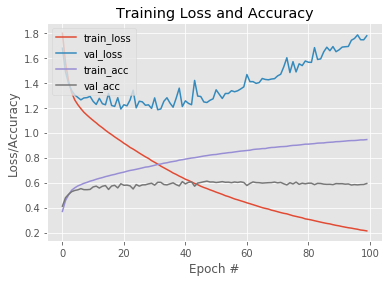

In [6]:
# Evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(
    testY.argmax(axis=1),
    predictions.argmax(axis=1),
    target_names=labelNames
))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()